# Decision Trees  in Python
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.

A decision tree consists of three types of nodes:

- Decision nodes – typically represented by squares
- Chance nodes – typically represented by circles
- End nodes – typically represented by triangles

# Task-4
### For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
## About the Data
Here we will be using the famous Iris flower data set.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis. 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


## Steps:
- Import Libraries
- Read the Data
- Data Preprocessing
- Train-Test Split
- Creating and Training the Model
- Predictions
- Residual Analysis
- Evaluating the model
- visualize the Decision Tree

**Let's get started!**

### Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline

### Check out the data

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Preprocessing

In [7]:
# checking for null values...
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**There is no null values in our data..**

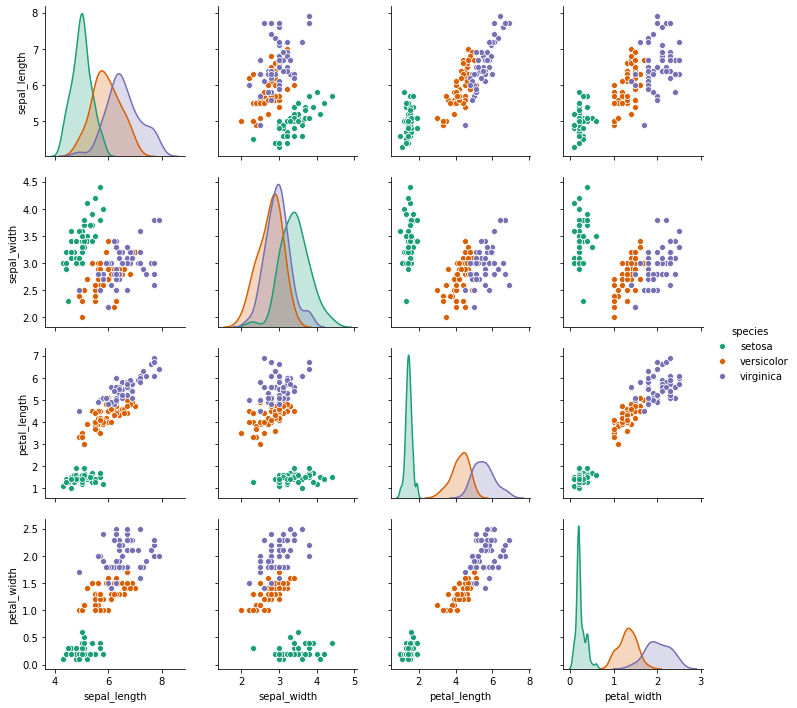

In [8]:
# Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables...
sns.pairplot(iris,hue='species',palette='Dark2')

In [9]:
iris["species"].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

#### Get dummies on "species" column

In [10]:
iris["species"]=iris["species"].map({"setosa":0,"virginica":1,"versicolor":2})

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Now our data is ready for Modeling...and also there is no need for Scalling.**

### Train-Test Split

In [12]:
X = iris.drop('species',axis=1)
y = iris['species']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

### Creating and Training the Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predictions

In [16]:
predictions = dtree.predict(X_test)

### Residual Analysis

Text(0.5, 0, 'Errors')

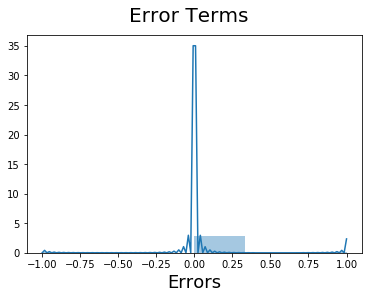

In [17]:
fig = plt.figure()
sns.distplot((y_test - predictions),)
fig.suptitle('Error Terms', fontsize = 20)               
plt.xlabel('Errors', fontsize = 18)

**Errors are normally distributed**

### Evaluating the model

In [18]:
from sklearn.metrics import classification_report,confusion_matrix,r2_score

In [19]:
print("Classification Report:")
print(classification_report(y_test,predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
print("Confusion matrix:")
print(confusion_matrix(y_test,predictions))

Confusion matrix:
[[13  0  0]
 [ 0 11  1]
 [ 0  1 19]]


In [21]:

print("R2 Score:",r2_score(y_test,predictions))

R2 Score: 0.9373259052924792


### Visualize the Decision Tree

In [25]:
# inorder to avoid graphviz related errors....
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

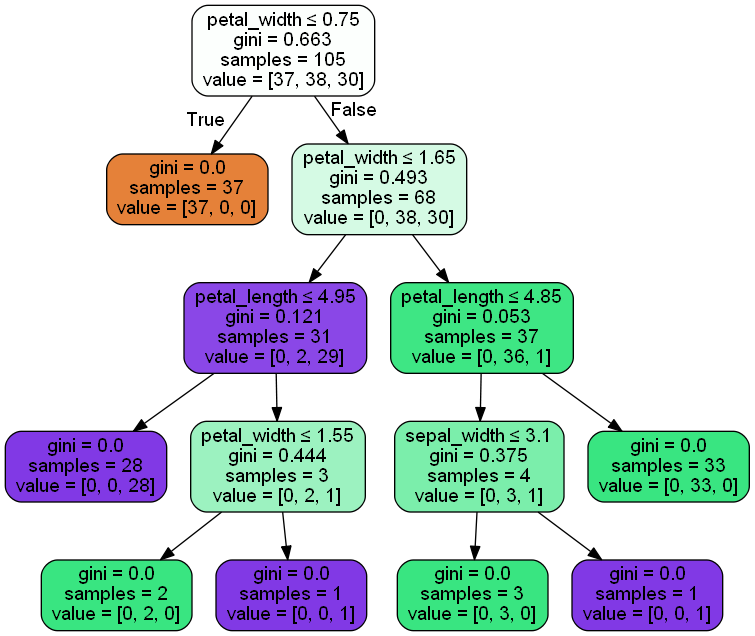

In [31]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())